# Exercise 1
   In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

(a) Fit a logistic regression model that uses income and balance to predict default.

(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

    i. Split the sample set into a training set and a validation set.

    ii. Fit a multiple logistic regression model using only the training observations.

    iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

    iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate

In [7]:
#install.packages('ISLR')
#install.packages('MASS')
library(ISLR)
attach(Default)

In [8]:
head(Default,15)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559
7,No,No,825.5133,24905.227
8,No,Yes,808.6675,17600.451
9,No,No,1161.0579,37468.529


In [9]:
cat('The sum of missing value:',sum(is.na(Default)))

The sum of missing value: 0

### (a) Fit a logistic regression model that uses income and balance to predict default.

In [13]:
log_res = glm(default ~ income + balance,data = Default,family = "binomial")
summary(log_res)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

   #### i. Split the sample set into a training set and a validation set.

In [15]:
num_train <- nrow(Default) * 0.75
in_train <- sample(nrow(Default),num_train)
training <- Default[in_train,]
testing <- Default[-in_train,]
cat('The sum of rows of Auto data:',nrow(Default))
cat('\nThe sum of rows of training data:',nrow(training))
cat('\nThe sum of rows of testing data:',nrow(testing))


The sum of rows of Auto data: 10000
The sum of rows of training data: 7500
The sum of rows of testing data: 2500

#### ii. Fit a multiple logistic regression model using only the training observations.

In [18]:
log_res1 = glm(default ~ income + balance,data = training , family = "binomial")
summary(log_res1)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2186  -0.1478  -0.0590  -0.0217   3.7082  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.146e+01  4.984e-01 -23.001  < 2e-16 ***
income       2.081e-05  5.669e-06   3.671 0.000241 ***
balance      5.624e-03  2.612e-04  21.527  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2205.6  on 7499  degrees of freedom
Residual deviance: 1214.7  on 7497  degrees of freedom
AIC: 1220.7

Number of Fisher Scoring iterations: 8


#### iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

In [22]:
probs <- predict(log_res1, testing, type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
head(pred.glm,10)

[1] "No" "No" "No" "No" "No" "No" "No" "No" "No" "No"

#### iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [24]:
cat('Accuracy:',mean(pred.glm != testing$default))

Accuracy: 0.0248

### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [30]:
num_train <- nrow(Default) * 0.75
in_train <- sample(nrow(Default),num_train)
training <- Default[in_train,]
testing <- Default[-in_train,]

log_res1 = glm(default ~ income + balance,data = training , family = "binomial")
probs <- predict(log_res1, testing, type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
cat('The test error rate with the validation set approach 1:',mean(pred.glm != testing$default))

The test error rate with the validation set approach 1: 0.0252

In [35]:
num_train <- nrow(Default) * 0.75
in_train <- sample(nrow(Default),num_train)
training <- Default[in_train,]
testing <- Default[-in_train,]

log_res1 = glm(default ~ income + balance,data = training , family = "binomial")
probs <- predict(log_res1, testing, type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
cat('The test error rate with the validation set approach 2:',mean(pred.glm != testing$default))

The test error rate with the validation set approach 2: 0.0264

In [34]:
num_train <- nrow(Default) * 0.75
in_train <- sample(nrow(Default),num_train)
training <- Default[in_train,]
testing <- Default[-in_train,]

log_res1 = glm(default ~ income + balance,data = training , family = "binomial")
probs <- predict(log_res1, testing, type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
cat('The test error rate with the validation set approach 3:',mean(pred.glm != testing$default))

The test error rate with the validation set approach 3: 0.0256

We see that the validation estimate of the test error rate can be variable, depending on precisely which observations are included in the training set and which observations are included in the validation set.

In [36]:
num_train <- nrow(Default) * 0.75
in_train <- sample(nrow(Default),num_train)
training <- Default[in_train,]
testing <- Default[-in_train,]

log_res1 = glm(default ~ income + balance + student,data = training , family = "binomial")
probs <- predict(log_res1, testing, type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
cat('The test error rate with the validation set approach:',mean(pred.glm != testing$default))

The test error rate with the validation set approach: 0.0256

# Exercise 2 
 We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

(a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

(b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

(c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

(d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

### (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.


In [38]:
set.seed(1)
lr<-glm(default~income+balance,family = binomial,data=Default)
summary(lr)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


### (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [39]:
boot.fn<-function(data,index){
  fit<-glm(default~income+balance,data=data,family="binomial",subset=index)
  return(coef(fit))
}

### (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [42]:
library(boot)
boot(Default,boot.fn,100)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 100)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  1.335891e-02 3.967262e-01
t2*  2.080898e-05  4.875168e-08 4.997011e-06
t3*  5.647103e-03 -1.054066e-05 2.226478e-04

### (d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.


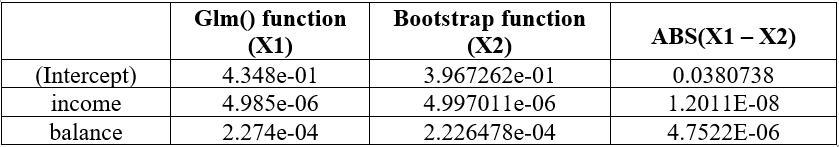

The standard error of coefficient estimates found from two methods are pretty close